In [12]:
#import requests
#from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

'''res = requests.get("http://www.cpbl.com.tw/web/team_playergrade.php?&team=B04&gameno=01")

soup = BeautifulSoup(res.text, 'lxml')

for item in soup.select('.gap_b20'):
    print(item.text.strip())'''


'res = requests.get("http://www.cpbl.com.tw/web/team_playergrade.php?&team=B04&gameno=01")\n\nsoup = BeautifulSoup(res.text, \'lxml\')\n\nfor item in soup.select(\'.gap_b20\'):\n    print(item.text.strip())'

In [13]:
Loree_url = 'http://www.cpbl.com.tw/pitcher/pbscore.html?&game_type=01&game_id=238&game_date=2018-09-29&pbyear=2018&type=&sgameno='
Loree_2018U = pd.read_html(Loree_url)[0]
#list.loc[(list['PLAYER'] == '陳傑憲')]
Loree_2018U.columns = ['PLAYER', 'BATS', 'AB', 'H', 'HR', 'BB', 'IBB', 'HBP', 'SO', 'AVG']
Loree_2018U.drop(Loree_2018U.index[[0]],inplace=True)
Loree_2018U = Loree_2018U.reset_index(drop=True)
Loree_2018U

,PLAYER,BATS,AB,H,HR,BB,IBB,HBP,SO,AVG
0,潘彥廷,L,2,0,0,0,0,0,0,0.000
1,陳傑憲,L,22,6,0,2,0,0,3,0.273
2,蘇智傑,L,20,6,2,1,0,0,9,0.300
3,唐肇廷,L,20,7,0,0,0,0,5,0.350
4,潘武雄,L,16,6,2,0,0,0,3,0.375
5,郭峻偉,R,1,0,0,1,0,0,0,0.000
6,高國慶,R,13,0,0,0,0,0,4,0.000
7,陳鏞基,R,22,5,2,1,1,0,9,0.227
8,鄭鎧文,R,4,1,0,0,0,0,2,0.250
9,陳重羽,R,12,3,0,0,0,0,3,0.250


In [17]:
Loree_2017U = pd.read_html(Loree_url)[1]
#list.loc[(list['PLAYER'] == '陳傑憲')]
Loree_2017U.columns = ['PLAYER', 'BATS', 'AB', 'H', 'HR', 'BB', 'IBB', 'HBP', 'SO', 'AVG']
Loree_2017U.drop(Loree_2017U.index[[0]],inplace=True)
Loree_2017U = Loree_2017U.reindex(index=[1,4,3,2,5,8,13,11,6,7,10,12])
Loree_2017U = Loree_2017U.reset_index(drop=True)
Loree_2017U

,PLAYER,BATS,AB,H,HR,BB,IBB,HBP,SO,AVG
0,潘彥廷,L,7,0,0,2,0,0,4,0.000
1,陳傑憲,L,34,12,0,0,0,0,1,0.353
2,蘇智傑,L,24,6,0,2,0,0,7,0.250
3,唐肇廷,L,20,3,0,0,0,0,7,0.150
4,潘武雄,L,12,5,1,4,0,0,2,0.417
5,郭峻偉,R,10,1,0,0,0,0,2,0.100
6,高國慶,R,26,9,1,2,0,0,5,0.346
7,陳鏞基,R,24,4,0,1,0,0,5,0.167
8,鄭鎧文,R,9,0,0,0,0,0,3,0.000
9,陳重羽,R,4,0,0,0,0,0,3,0.000


In [46]:
#轉換型態為float
Loree_2018U[['AB', 'H', 'HR', 'BB', 'IBB', 'HBP', 'SO', 'AVG']] = Loree_2018U[['AB', 'H', 'HR', 'BB', 'IBB', 'HBP', 'SO', 'AVG']].astype(float)
Loree_2017U[['AB', 'H', 'HR', 'BB', 'IBB', 'HBP', 'SO', 'AVG']] = Loree_2017U[['AB', 'H', 'HR', 'BB', 'IBB', 'HBP', 'SO', 'AVG']].astype(float)
    
Loree_2018U.dtypes

PLAYER     object
BATS       object
AB        float64
H         float64
HR        float64
BB        float64
IBB       float64
HBP       float64
SO        float64
AVG       float64
dtype: object

In [48]:
Loree_2018U_AVG = Loree_2018U[['PLAYER','AVG']].copy()
Loree_2017U_AVG = Loree_2017U[['PLAYER','AVG']].copy()
Loree_2018U_AVG.rename(columns={"AVG": "AVG_2018"}, inplace = True)
Loree_2017U_AVG.rename(columns={"AVG": "AVG_2017"}, inplace = True)
Loree_U_AVG = pd.merge(Loree_2018U_AVG, Loree_2017U_AVG, how='inner')
#Loree_2018U_AVG
Loree_U_AVG

,PLAYER,AVG_2018,AVG_2017
0,潘彥廷,0.000,0.000
1,陳傑憲,0.273,0.353
2,蘇智傑,0.300,0.250
3,唐肇廷,0.350,0.150
4,潘武雄,0.375,0.417
5,郭峻偉,0.000,0.100
6,高國慶,0.000,0.346
7,陳鏞基,0.227,0.167
8,鄭鎧文,0.250,0.000
9,陳重羽,0.250,0.000


Text(0,0.5,'AVG')

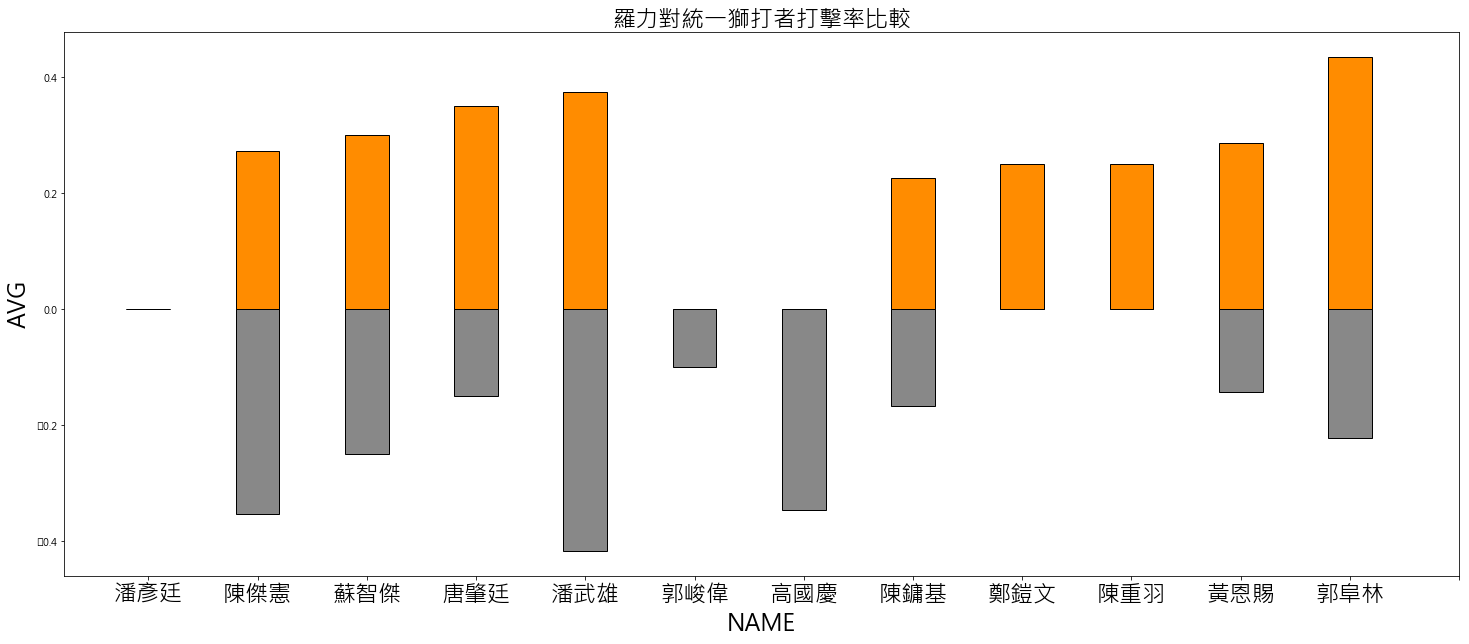

In [61]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(111)

for (i, row) in Loree_U_AVG.iterrows():
    plt.bar([i, i], [row['AVG_2018'], -row['AVG_2017']],
             color=['#FF8C00', '#888888'], width=0.4, align='center', edgecolor='#000000')
'''   
for (i, row) in Loree_U_AVG.iterrows():
    plt.bar([i], [-row['AVG_2017']],
             color=['#888888'], width=0.4, align='center', edgecolor='#000000', label='2017')
''' 
plt.xticks(range(0, 13), Loree_U_AVG['PLAYER'], fontsize=23)

#plt.legend()
plt.title("羅力對統一獅打者打擊率比較", fontsize=23)
plt.xlabel('NAME', fontsize=23)
plt.ylabel('AVG', fontsize=23)

In [139]:
Loree_2018U_Th = Loree_2018U[['PLAYER', 'AB', 'H', 'HR', 'BB', 'IBB', 'HBP']].copy()
Loree_2018U_Th

,PLAYER,AB,H,HR,BB,IBB,HBP
0,潘彥廷,2.0,0.0,0.0,0.0,0.0,0.0
1,陳傑憲,22.0,6.0,0.0,2.0,0.0,0.0
2,蘇智傑,20.0,6.0,2.0,1.0,0.0,0.0
3,唐肇廷,20.0,7.0,0.0,0.0,0.0,0.0
4,潘武雄,16.0,6.0,2.0,0.0,0.0,0.0
5,郭峻偉,1.0,0.0,0.0,1.0,0.0,0.0
6,高國慶,13.0,0.0,0.0,0.0,0.0,0.0
7,陳鏞基,22.0,5.0,2.0,1.0,1.0,0.0
8,鄭鎧文,4.0,1.0,0.0,0.0,0.0,0.0
9,陳重羽,12.0,3.0,0.0,0.0,0.0,0.0


In [140]:
temp = (Loree_2018U_Th['H']-Loree_2018U_Th['HR'])*2+Loree_2018U_Th['HR']*8+Loree_2018U_Th['BB']+Loree_2018U_Th['IBB']+Loree_2018U_Th['HBP']
pmet = Loree_2018U_Th['AB'] + Loree_2018U_Th['BB']+Loree_2018U_Th['IBB']+Loree_2018U_Th['HBP']
#Loree_2018U_Th.insert(7, 'Threat', temp)
Loree_2018U_Th['Threat'] = temp/pmet
#Loree_2018U_Th.drop(columns=['Threat'],inplace=True)
Loree_2018U_Th = Loree_2018U_Th[['PLAYER','Threat']]
Loree_2018U_Th

,PLAYER,Threat
0,潘彥廷,0.000000
1,陳傑憲,0.583333
2,蘇智傑,1.190476
3,唐肇廷,0.700000
4,潘武雄,1.500000
5,郭峻偉,0.500000
6,高國慶,0.000000
7,陳鏞基,1.000000
8,鄭鎧文,0.500000
9,陳重羽,0.500000


In [141]:
Loree_2018U_De = Loree_2018U[['PLAYER', 'AB', 'H', 'BB', 'IBB', 'HBP', 'SO']].copy()
Loree_2018U_De

,PLAYER,AB,H,BB,IBB,HBP,SO
0,潘彥廷,2.0,0.0,0.0,0.0,0.0,0.0
1,陳傑憲,22.0,6.0,2.0,0.0,0.0,3.0
2,蘇智傑,20.0,6.0,1.0,0.0,0.0,9.0
3,唐肇廷,20.0,7.0,0.0,0.0,0.0,5.0
4,潘武雄,16.0,6.0,0.0,0.0,0.0,3.0
5,郭峻偉,1.0,0.0,1.0,0.0,0.0,0.0
6,高國慶,13.0,0.0,0.0,0.0,0.0,4.0
7,陳鏞基,22.0,5.0,1.0,1.0,0.0,9.0
8,鄭鎧文,4.0,1.0,0.0,0.0,0.0,2.0
9,陳重羽,12.0,3.0,0.0,0.0,0.0,3.0


In [142]:
temp = (Loree_2018U_De['AB']-Loree_2018U_De['H']-Loree_2018U_De['SO'])+Loree_2018U_De['SO']*3
pmet = Loree_2018U_De['AB'] + Loree_2018U_De['BB']+Loree_2018U_De['IBB']+Loree_2018U_De['HBP']
#Loree_2018U_De.insert(4, 'Defense', temp)
Loree_2018U_De['Defense'] = temp/pmet
#Loree_2018U_De.drop(columns=[''Defense'],inplace=True)
Loree_2018U_De = Loree_2018U_De[['PLAYER','Defense']]

Loree_2018U_De

,PLAYER,Defense
0,潘彥廷,1.000000
1,陳傑憲,0.916667
2,蘇智傑,1.523810
3,唐肇廷,1.150000
4,潘武雄,1.000000
5,郭峻偉,0.500000
6,高國慶,1.615385
7,陳鏞基,1.458333
8,鄭鎧文,1.750000
9,陳重羽,1.250000


In [143]:
Loree_2018U_TH = pd.merge(Loree_2018U_Th, Loree_2018U_De, how='inner')
Loree_2018U_TH

,PLAYER,Threat,Defense
0,潘彥廷,0.000000,1.000000
1,陳傑憲,0.583333,0.916667
2,蘇智傑,1.190476,1.523810
3,唐肇廷,0.700000,1.150000
4,潘武雄,1.500000,1.000000
5,郭峻偉,0.500000,0.500000
6,高國慶,0.000000,1.615385
7,陳鏞基,1.000000,1.458333
8,鄭鎧文,0.500000,1.750000
9,陳重羽,0.500000,1.250000


In [144]:
Loree_2017U_Th = Loree_2017U[['PLAYER', 'AB', 'H', 'HR', 'BB', 'IBB', 'HBP']].copy()
temp = (Loree_2017U_Th['H']-Loree_2017U_Th['HR'])*2+Loree_2017U_Th['HR']*8+Loree_2017U_Th['BB']+Loree_2017U_Th['IBB']+Loree_2017U_Th['HBP']
pmet = Loree_2017U_Th['AB'] + Loree_2017U_Th['BB']+Loree_2017U_Th['IBB']+Loree_2017U_Th['HBP']
#Loree_2017U_Th.insert(7, 'Threat', temp)
Loree_2017U_Th['Threat'] = temp/pmet
#Loree_2017U_Th.drop(columns=['Threat'],inplace=True)
Loree_2017U_Th = Loree_2017U_Th[['PLAYER','Threat']]

Loree_2017U_De = Loree_2017U[['PLAYER', 'AB', 'H', 'BB', 'IBB', 'HBP', 'SO']].copy()
temp = (Loree_2017U_De['AB']-Loree_2017U_De['H']-Loree_2017U_De['SO'])+Loree_2017U_De['SO']*3
pmet = Loree_2017U_De['AB']+Loree_2017U_De['BB']+Loree_2017U_De['IBB']+Loree_2017U_De['HBP']
#Loree_2017U_De.insert(4, 'Defense', temp)
Loree_2017U_De['Defense'] = temp/pmet
#Loree_2017U_De.drop(columns=[''Defense'],inplace=True)
Loree_2017U_De = Loree_2017U_De[['PLAYER','Defense']]

Loree_2017U_TH = pd.merge(Loree_2017U_Th, Loree_2017U_De, how='inner')
Loree_2017U_TH

,PLAYER,Threat,Defense
0,潘彥廷,0.222222,1.666667
1,陳傑憲,0.705882,0.705882
2,蘇智傑,0.538462,1.230769
3,唐肇廷,0.300000,1.550000
4,潘武雄,1.250000,0.687500
5,郭峻偉,0.200000,1.300000
6,高國慶,0.928571,0.964286
7,陳鏞基,0.360000,1.200000
8,鄭鎧文,0.000000,1.666667
9,陳重羽,0.000000,2.500000


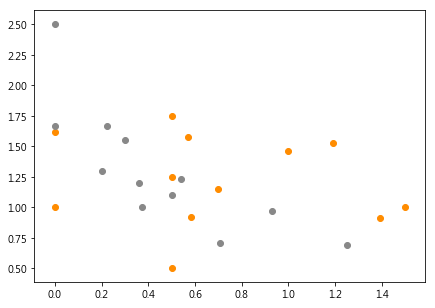

In [168]:
fig = plt.figure(figsize=(7,5))
x = Loree_2018U_TH['Threat']
y = Loree_2018U_TH['Defense']

a = Loree_2017U_TH['Threat']
b = Loree_2017U_TH['Defense']
plt.scatter(x, y, c='#FF8C00')
plt.scatter(a, b, c='#888888')

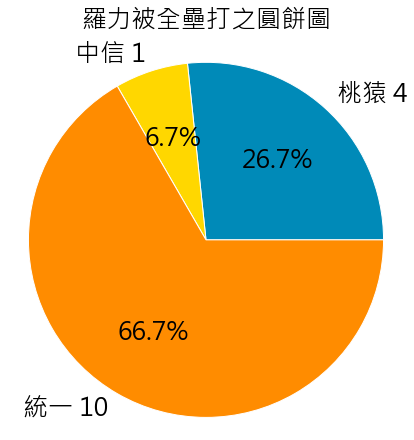

In [195]:
fig = plt.figure(figsize=(7,7))
labels = '桃猿 4', '中信 1', '統一 10'
sizes = [4, 1, 10]
colors = ['#008AB8', '#FFD700', '#FF8C00']

plt.pie(sizes,labels=labels, autopct='%1.1f%%', colors = colors, wedgeprops=dict(edgecolor='#FFFFFF'),
        textprops = {'fontsize':25})
plt.text(-0.7,1.2,"羅力被全壘打之圓餅圖", fontsize=25)
plt.axis('equal') 
#plt.title("羅力被全壘打之圓餅圖", fontsize=25)
plt.show()